In [3]:
print("""
FullName : Frank Evin Yami Ngassam
Student’s Number: 0232112159

Modelling and Analysis of Complex Networks
Assignment 4
Number of the dataset : 5
""")


FullName : Frank Evin Yami Ngassam
Student’s Number: 0232112159

Modelling and Analysis of Complex Networks
Assignment 3
Number of the dataset : 5



IMPORT LIBRARIES

In [4]:
# import the modules
import urllib.request
import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt


from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from sklearn.metrics import jaccard_score


from collections import Counter

DATA LOADING

In [5]:
# Correct URLs pointing to the raw files on GitHub
facebook_url = "https://raw.githubusercontent.com/1250326/exercise_complex_network/master/Datasets/Group5/Facebook-Ego/686.edges"
twitter_url = "https://raw.githubusercontent.com/1250326/exercise_complex_network/master/Datasets/Group5/Twitter-Ego/1435461.edges"

# Download the Facebook-Ego network file
urllib.request.urlretrieve(facebook_url, "facebook.edges")
# Load the Facebook-Ego network as an undirected graph
facebook_network = nx.read_edgelist("facebook.edges", nodetype=int)

# Download the Twitter-Ego network file
urllib.request.urlretrieve(twitter_url, "twitter.edges")
# Load the Twitter-Ego network as a directed graph
twitter_network = nx.read_edgelist("twitter.edges", nodetype=int, create_using=nx.DiGraph())

In [6]:
###(a) Choose one of the datasets, calculate the betweenness closeness and PageRank mentioned in the
#lecture on all of the nodes. Please compare the results. What cause the difference between the
#results?

# Calculate Betweenness, Closeness, and PageRank
betweenness_centrality = nx.betweenness_centrality(facebook_network)
closeness_centrality = nx.closeness_centrality(facebook_network)
pagerank = nx.pagerank(facebook_network)

# Print the results
print("Betweenness Centrality:")
for node, value in sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {value}")

print("\nCloseness Centrality:")
for node, value in sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {value}")

print("\nPageRank:")
for node, value in sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:5]:
    print(f"Node {node}: {value}")

Betweenness Centrality:
Node 713: 0.13741194434486204
Node 828: 0.05924555520517978
Node 818: 0.051453896571783286
Node 719: 0.05047875627653779
Node 705: 0.049064324504153475

Closeness Centrality:
Node 713: 0.6007194244604317
Node 828: 0.594306049822064
Node 719: 0.5699658703071673
Node 805: 0.5680272108843537
Node 705: 0.5641891891891891

PageRank:
Node 828: 0.01902656402891602
Node 713: 0.018799278716670694
Node 705: 0.016721273871313794
Node 719: 0.015552113726713895
Node 805: 0.015153657614800262


In [7]:
#b) Compare the results.

print("""1. Betweenness Centrality:
Node 713: Highest betweenness centrality (0.1374)
Node 828: Second highest betweenness centrality (0.0592)
Factors causing differences:

Node 713 plays a crucial role in connecting different parts of the network. It lies on many shortest paths between other nodes, thus having the highest betweenness.
Node 828 also has significant betweenness centrality but is less critical in facilitating communication compared to Node 713, likely due to being on fewer shortest paths.
2. Closeness Centrality:
Node 713: Highest closeness centrality (0.6007)
Node 828: Second highest closeness centrality (0.5943)
Factors causing differences:

Node 713 is very close to many other nodes, minimizing the average distance needed to reach all other nodes in the network.
Node 828 is also relatively well-connected, but its overall proximity to other nodes is slightly lower than Node 713, hence a smaller closeness score.
3. PageRank:
Node 828: Highest PageRank (0.0190)
Node 713: Second highest PageRank (0.0188)
Factors causing differences:

Node 828 is considered more influential based on its connections to important nodes. Its PageRank reflects not just the number of its connections but the quality of those connections.
Node 713 is also influential, but it is slightly less connected to highly influential nodes compared to Node 828, resulting in a lower PageRank score.
Common Factors:
All three centrality measures highlight Node 713 as a prominent node, indicating its importance in the network structure.
Node 828 also appears as a key player in both betweenness and PageRank, but its role differs slightly depending on the specific aspect of the network being measured.
Overall Factors causing differences:
Network Topology: The structure of connections in the network significantly impacts the centrality measures. Nodes like 713 and 828 are connected in ways that make them central by different definitions (e.g., shortest paths, influence).
Communication Patterns: Betweenness centrality is influenced by how often nodes facilitate communication between other nodes, explaining why 713 ranks highest in this measure.
Link Structure: PageRank emphasizes the influence of connected neighbors, which can lead to different rankings than betweenness or closeness centrality.
Conclusion:
The differences in the centrality measures arise because each captures a distinct aspect of node importance: betweenness focuses on shortest paths, closeness on average distance, and PageRank on global influence. Each measure contributes to a comprehensive understanding of node roles in the network.

      """)

1. Betweenness Centrality:
Node 713: Highest betweenness centrality (0.1374)
Node 828: Second highest betweenness centrality (0.0592)
Factors causing differences:

Node 713 plays a crucial role in connecting different parts of the network. It lies on many shortest paths between other nodes, thus having the highest betweenness.
Node 828 also has significant betweenness centrality but is less critical in facilitating communication compared to Node 713, likely due to being on fewer shortest paths.
2. Closeness Centrality:
Node 713: Highest closeness centrality (0.6007)
Node 828: Second highest closeness centrality (0.5943)
Factors causing differences:

Node 713 is very close to many other nodes, minimizing the average distance needed to reach all other nodes in the network.
Node 828 is also relatively well-connected, but its overall proximity to other nodes is slightly lower than Node 713, hence a smaller closeness score.
3. PageRank:
Node 828: Highest PageRank (0.0190)
Node 713: Second h

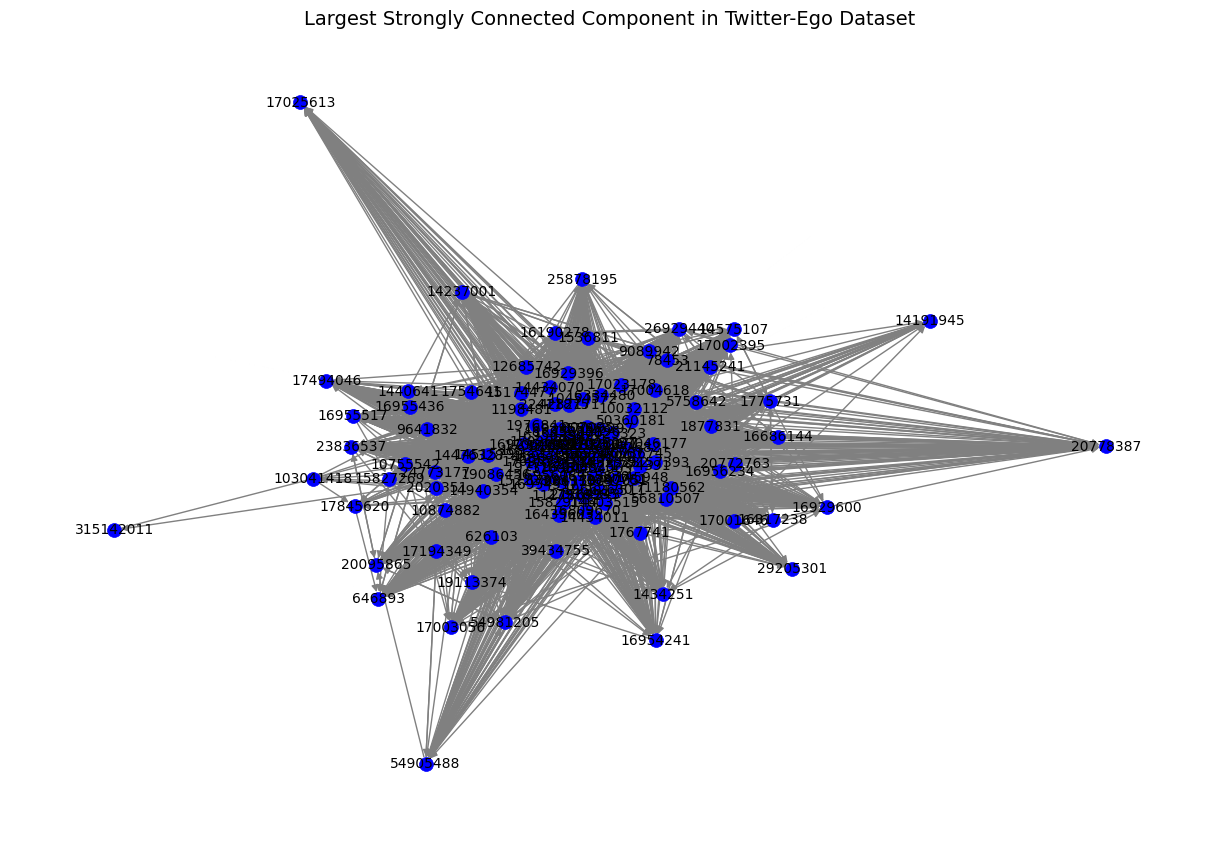

In [12]:
#(c) Please plot the largest strong connected component in the Twitter-Ego dataset:

# Find the strongly connected components
strongly_connected_components = nx.strongly_connected_components(twitter_network)

# Find the largest strongly connected component
largest_strongly_connected_component = max(strongly_connected_components, key=len)

# Create a subgraph containing only the largest strongly connected component
largest_strongly_connected_subgraph = twitter_network.subgraph(largest_strongly_connected_component)

# Plot the largest strongly connected component  
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(largest_strongly_connected_subgraph)
nx.draw(
    largest_strongly_connected_subgraph,
    pos,
    with_labels=True,
    node_size=100,   
    node_color='blue',
    font_size=10,  
    font_color='black',
    edge_color='gray',
    linewidths=0.5,
)
plt.title('Largest Strongly Connected Component in Twitter-Ego Dataset', fontsize=14)
plt.show()

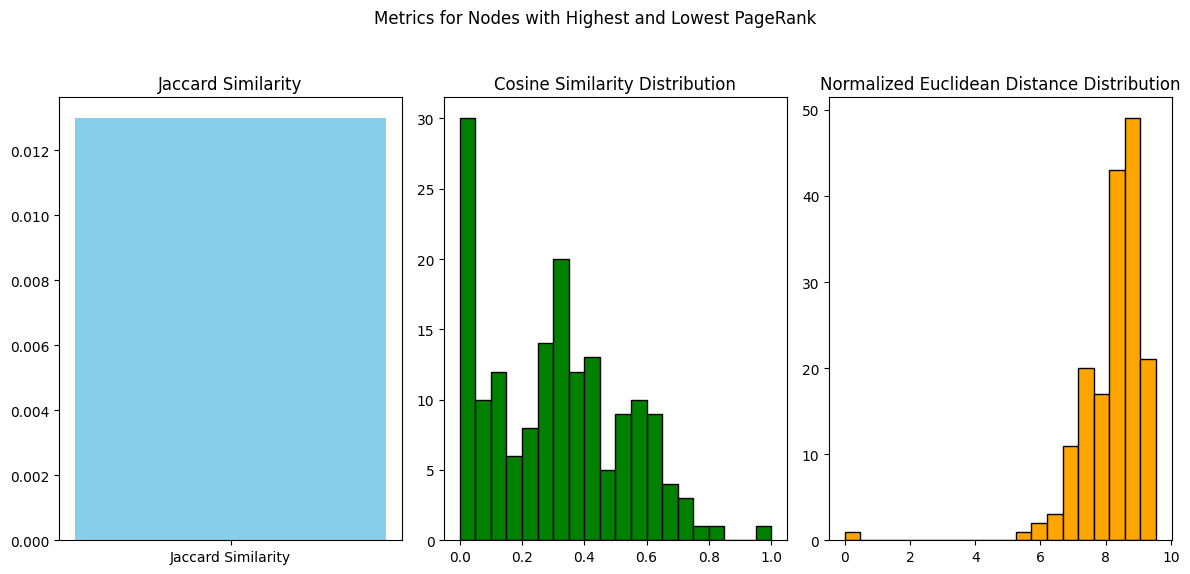

In [15]:
###(d) Choose the results of one of the two algorithms mentioned in question (a), and choose the node
#with the highest value and the node with lowest value. Please plot the distributions of Jaccard
#similarity, cosine similarity and normalized Euclidean distance between either of the two nodes
#and the rest of the nodes in the graph.

# Calculate PageRank
pagerank = nx.pagerank(facebook_network)

# Find the node with the highest PageRank value
highest_pagerank_node = max(pagerank, key=pagerank.get)

# Find the node with the lowest PageRank value
lowest_pagerank_node = min(pagerank, key=pagerank.get)

# Get the subgraph with the neighbors of the highest and lowest PageRank nodes
highest_pagerank_neighbors = set(facebook_network.neighbors(highest_pagerank_node))
lowest_pagerank_neighbors = set(facebook_network.neighbors(lowest_pagerank_node))

# Convert node identifiers to array indices
node_indices = list(facebook_network.nodes())
highest_pagerank_index = node_indices.index(highest_pagerank_node)
lowest_pagerank_index = node_indices.index(lowest_pagerank_node)

# Calculate Jaccard similarity
common_neighbors = highest_pagerank_neighbors.intersection(lowest_pagerank_neighbors)
all_neighbors = highest_pagerank_neighbors.union(lowest_pagerank_neighbors)
jaccard_similarity = len(common_neighbors) / len(all_neighbors) if len(all_neighbors) > 0 else 0

# Calculate Cosine similarity and Normalized Euclidean distance
node_features = nx.to_numpy_array(facebook_network)
highest_pagerank_features = node_features[highest_pagerank_index]
lowest_pagerank_features = node_features[lowest_pagerank_index]

cosine_sim = cosine_similarity([highest_pagerank_features], node_features)[0]
euclidean_dist = euclidean_distances([highest_pagerank_features], node_features)[0]

# Plot the distributions
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(['Jaccard Similarity'], [jaccard_similarity], color='skyblue')
plt.title('Jaccard Similarity')

plt.subplot(1, 3, 2)
plt.hist(cosine_sim, bins=20, color='green', edgecolor='black')
plt.title('Cosine Similarity Distribution')

plt.subplot(1, 3, 3)
plt.hist(euclidean_dist, bins=20, color='orange', edgecolor='black')
plt.title('Normalized Euclidean Distance Distribution')

plt.suptitle('Metrics for Nodes with Highest and Lowest PageRank')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()